Applied AI Assignment 

Student id : 201648205


Import necessary libraries 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools



Read the dataset from a CSV file and  display its summary and print the number of samples in each class.


In [4]:
data = pd.read_csv('dataset_assignment1.csv')
data.head()
data.info()
# as the  data is stored in a variable called "data"
num_class_0 = len(data[data['class'] == 0])
num_class_1 = len(data[data['class'] == 1])




print(f"Number of samples in class 0: {num_class_0}")
print(f"Number of samples in class 1: {num_class_1}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
Number of samples in class 0: 459
Number of samples in class 1: 241


In [5]:
# As the target variable is called "class" and is binary (0 or 1)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# display the shapes of the data arrays
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

#printing the number of traning examples
print ('We have %d training examples' % (len(y)))

X_train shape: (700, 9)
y_train shape: (700,)
We have 700 training examples


In [6]:
#Printing the first five elements in x train and y train 
print("First five elements in X_train are:\n", X[:5])
print("Type of X_train:",type(X))

print("First five elements in y_train are:\n", y[:5])
print("Type of y_train:",type(y))

First five elements in X_train are:
 [[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 [0 0 0 0 0]
Type of y_train: <class 'numpy.ndarray'>


Print the statistical description of features for each class


In [7]:
# As the  data is stored in a Pandas DataFrame called "data"
# and the class labels are stored in a column called "class"
for label in sorted(data['class'].unique()):
    class_data = data[data['class'] == label]
    print(f"Class {label}:")
    print(class_data.iloc[:, :-1].describe())

Class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
25%      1.000000    1.000000    1.000000

Plot histograms to visualise the dataset

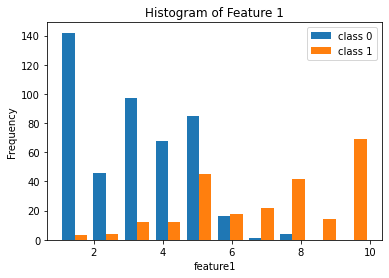

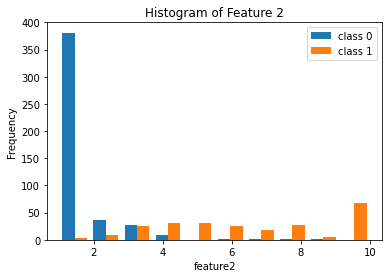

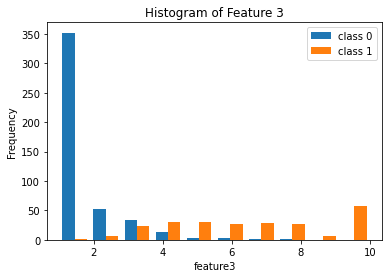

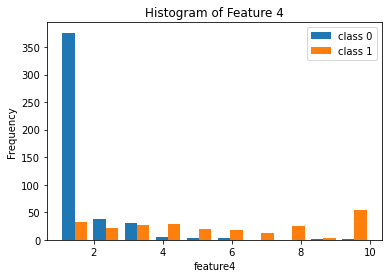

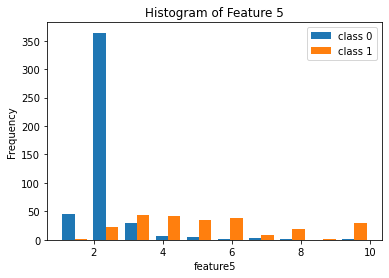

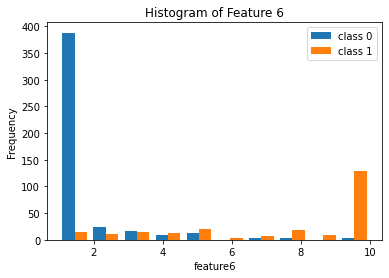

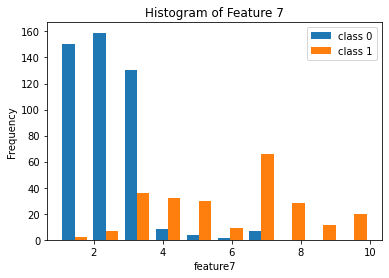

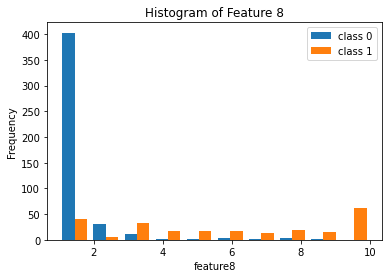

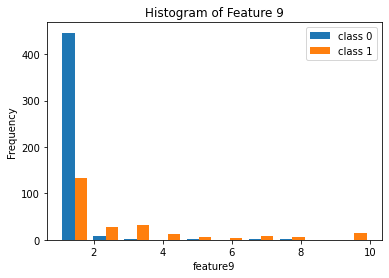

In [8]:
# extracting the features and target variable from the dataframe
dataset = data
n_features = dataset.iloc[:,:-1]
n_labels = dataset.iloc[:,-1]

# looping through each feature column and create a separate histogram for each feature
for k in range(n_features.shape[1]):
    # create a new figure and axis object
    fig, ax = plt.subplots(figsize=(6, 4))
    # plot the histogram on the axis object
    ax.hist([n_features.loc[n_labels == 0, n_features.columns[k]], n_features.loc[n_labels == 1, n_features.columns[k]]], bins=10, label=['class 0', 'class 1'])
    ax.set_xlabel(n_features.columns[k])
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Feature ' + str(k+1))
    ax.legend()
    plt.show()




First model KNN

Best k for accuracy: 9
Best k for precision: 21
Best k for recall: 7
Best k for f1: 9
Train  accuracy: 0.9732142857142857
Train  precision: 0.9591836734693877
Train  recall: 0.9641025641025641
Train  F1-Score: 0.9616368286445012


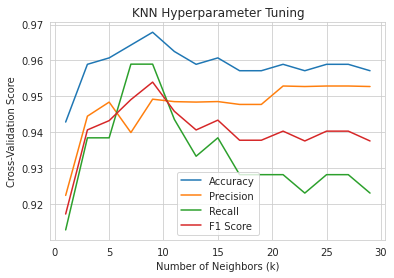

In [15]:
#Data is processed in the intial stage 

# Now split the  dataset into training and testing sets for 80 , 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we set the  hyperparameter range from 1 to 31
k_values = list(range(1, 31, 2))

# Perform K-Fold Cross Validation for each value of k using different scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
best_k = {}
for metric in scoring_metrics:
    cv_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=metric)
        cv_scores.append(scores.mean())
    best_k[metric] = k_values[cv_scores.index(max(cv_scores))]

# Printing  the best value of k for each scoring metric
for metric, k in best_k.items():
    print(f"Best k for {metric}: {k}")

# Training  the KNN model on the training data with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions on the train data (X_train)
y_pred_train = knn.predict(X_train)

# We Evaluate the model on the validation data
print(f"Train  accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Train  precision: {precision_score(y_train, y_pred_train)}")
print(f"Train  recall: {recall_score(y_train, y_pred_train)}")
print(f"Train  F1-Score: {f1_score(y_train, y_pred_train)}")




# Performing K-Fold Cross Validation for each value of k using accuracy scoring
cv_score_acc = []
cv_score_prec = []
cv_score_recall = []
cv_score_f1 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_acc = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores_prec = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision')
    scores_recall = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    scores_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
    
    cv_score_acc.append(scores_acc.mean())
    cv_score_prec.append(scores_prec.mean())
    cv_score_recall.append(scores_recall.mean())
    cv_score_f1.append(scores_f1.mean())

# Finding the value of k that gives the best accuracy score during cross-validation
best_k_acc = k_values[cv_score_acc.index(max(cv_score_acc))]
best_k_prec = k_values[cv_score_prec.index(max(cv_score_prec))]
best_k_recall = k_values[cv_score_recall.index(max(cv_score_recall))]
best_k_f1 = k_values[cv_score_f1.index(max(cv_score_f1))]

# Ploting the cross-validation accuracy scores for each value of k
plt.plot(k_values, cv_score_acc, label='Accuracy')
plt.plot(k_values, cv_score_prec, label='Precision')
plt.plot(k_values, cv_score_recall, label='Recall')
plt.plot(k_values, cv_score_f1, label='F1 Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Score')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.show()

For logisti regression


Best C for F1-score: 0.1
Best C for recall: 0.1
Best C for precision: 0.001
Best C for accuracy: 0.1
Training set accuracy: 0.9678571428571429
Training set precision: 0.9538461538461539
Training set recall: 0.9538461538461539
Training set F1-Score: 0.9538461538461539


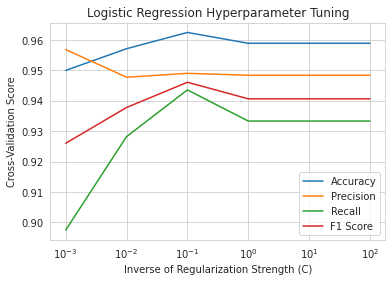

In [16]:
# For logistic regression set hyperparameter range
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Performing K-Fold Cross Validation for each value of C using accuracy scoring
cv_score_acc = []
for C in C_values:
    logreg = LogisticRegression(C=C)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
    cv_score_acc.append(scores.mean())

# Finding the value of C that gives the best accuracy score during cross-validation
best_C_acc = C_values[cv_score_acc.index(max(cv_score_acc))]


# Performing K-Fold Cross Validation for each value of C using precision scoring
cv_score_prec = []
for C in C_values:
    logreg = LogisticRegression(C=C)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='precision')
    cv_score_prec.append(scores.mean())

# Finding the value of C that gives the best precision score during cross-validation
best_C_prec = C_values[cv_score_prec.index(max(cv_score_prec))]


# Performing K-Fold Cross Validation for each value of C using recall scoring
cv_score_recall = []
for C in C_values:
    logreg = LogisticRegression(C=C)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='recall')
    cv_score_recall.append(scores.mean())

# Finding the value of C that gives the best recall score during cross-validation
best_C_recall = C_values[cv_score_recall.index(max(cv_score_recall))]


# Performing K-Fold Cross Validation for each value of C using F1-score scoring
cv_score_f1 = []
for C in C_values:
    logreg = LogisticRegression(C=C)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
    cv_score_f1.append(scores.mean())

# Finding the value of C that gives the best F1-score during cross-validation
best_C_f1 = C_values[cv_score_f1.index(max(cv_score_f1))]

# here we define  a dictionary containing the best C values for each metric
best_C_dict = {'F1-score': best_C_f1,
               'recall': best_C_recall,
               'precision': best_C_prec,
               'accuracy': best_C_acc}

# Using  a for loop to print out the best C value for each metric
for metric, best_C in best_C_dict.items():
    print(f"Best C for {metric}: {best_C}")

# Training the logistic regression model on the training data with C=0.1
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

# Making predictions on the training data (X_train)
y_pred_train = logreg.predict(X_train)

# Evaluate the model on the training data
print(f"Training set accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Training set precision: {precision_score(y_train, y_pred_train)}")
print(f"Training set recall: {recall_score(y_train, y_pred_train)}")
print(f"Training set F1-Score: {f1_score(y_train, y_pred_train)}")



# Ploting the cross-validation accuracy scores for each value of C
plt.plot(C_values, cv_score_acc, label='Accuracy')
plt.plot(C_values, cv_score_prec, label='Precision')
plt.plot(C_values, cv_score_recall, label='Recall')
plt.plot(C_values, cv_score_f1, label='F1 Score')
plt.xlabel('Inverse of Regularization Strength (C)')
plt.xscale('log')
plt.ylabel('Cross-Validation Score')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.legend()
plt.show()





For decision trees


Best max_depth for F1-score: 3
Best max_depth for recall: 3
Best max_depth for precision: 5
Best max_depth for accuracy: 5
Training set accuracy: 0.9785714285714285
Training set precision: 0.9507389162561576
Training set recall: 0.9897435897435898
Training set F1-Score: 0.9698492462311559


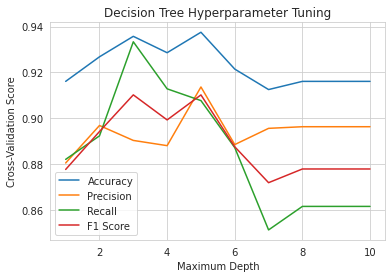

In [17]:
# Define hyperparameter range
max_depth_values = list(range(1, 11))

# Performing K-Fold Cross Validation for each value of max_depth using accuracy scoring
cv_score_acc = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    cv_score_acc.append(scores.mean())

# Finding the value of max_depth that gives the best accuracy score during cross-validation
best_depth_acc = max_depth_values[cv_score_acc.index(max(cv_score_acc))]

# Performing K-Fold Cross Validation for each value of max_depth using precision scoring
cv_score_prec = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='precision')
    cv_score_prec.append(scores.mean())

# Finding the value of max_depth that gives the best precision score during cross-validation
best_depth_prec = max_depth_values[cv_score_prec.index(max(cv_score_prec))]

# Performing K-Fold Cross Validation for each value of max_depth using recall scoring
cv_score_recall = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='recall')
    cv_score_recall.append(scores.mean())

# Finding the value of max_depth that gives the best recall score during cross-validation
best_depth_recall = max_depth_values[cv_score_recall.index(max(cv_score_recall))]

# Performing K-Fold Cross Validation for each value of max_depth using F1-score scoring
cv_score_f1 = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='f1')
    cv_score_f1.append(scores.mean())

# Finding the value of max_depth that gives the best F1-score during cross-validation
best_depth_f1 = max_depth_values[cv_score_f1.index(max(cv_score_f1))]

# Define a dictionary containing the best max_depth values for each metric
best_depth_dict = {'F1-score': best_depth_f1,
                   'recall': best_depth_recall,
                   'precision': best_depth_prec,
                   'accuracy': best_depth_acc}

# Using a for loop to print out the best max_depth value for each metric
for metric, best_depth in best_depth_dict.items():
    print(f"Best max_depth for {metric}: {best_depth}")


# Training the decision tree model on the training data with max_depth=5
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Making predictions on the training data (X_train)
y_pred_train = dt.predict(X_train)

# Evaluate the model on the training data
print(f"Training set accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Training set precision: {precision_score(y_train, y_pred_train)}")
print(f"Training set recall: {recall_score(y_train, y_pred_train)}")
print(f"Training set F1-Score: {f1_score(y_train, y_pred_train)}")



# Plot the cross-validation accuracy scores for each value of max_depth
plt.plot(max_depth_values, cv_score_acc, label='Accuracy')
plt.plot(max_depth_values, cv_score_prec, label='Precision')
plt.plot(max_depth_values, cv_score_recall, label='Recall')
plt.plot(max_depth_values, cv_score_f1, label='F1 Score')
plt.xlabel('Maximum Depth')
plt.ylabel('Cross-Validation Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.legend()
plt.show()


Testing the data on KNN  model as we choose knn as best and testing on other two models to support the decision 


Test  accuracy: 0.9857142857142858
Test  precision: 0.9782608695652174
Test  recall: 0.9782608695652174
Test  F1-Score: 0.9782608695652174


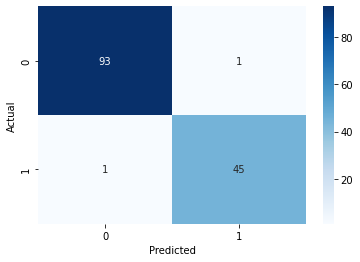

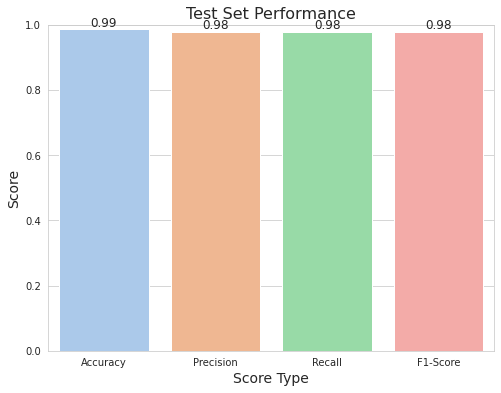

In [12]:
# Training the KNN model on the training data with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions on the test data (X_test)
y_pred_test = knn.predict(X_test)

# Then we evaluate the model on the test data
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Test  accuracy: {acc}")
print(f"Test  precision: {prec}")
print(f"Test  recall: {rec}")
print(f"Test  F1-Score: {f1}")



# Ploting  the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Create a dictionary with the score types and their corresponding scores
scores = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

# Converting the dictionary to a pandas DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Seting the style of the plot
sns.set_style('whitegrid')

# Create a bar plot of the scores
plt.figure(figsize=(8,6))
sns.barplot(x=scores_df.index, y=scores_df.Score, palette='pastel')

# Adding labels to the plot
plt.title('Test Set Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Score Type', fontsize=14)
plt.ylim([0, 1])

# Adding the score values to the bars
for i, v in enumerate(scores_df.Score):
    plt.text(i, v+0.01, f'{v:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()



Test set accuracy: 0.9642857142857143
Test set precision: 0.9767441860465116
Test set recall: 0.9130434782608695
Test set F1-Score: 0.9438202247191011


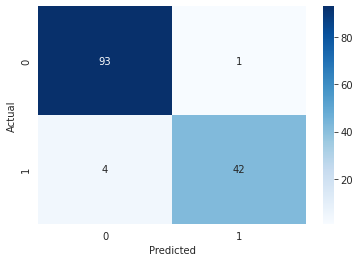

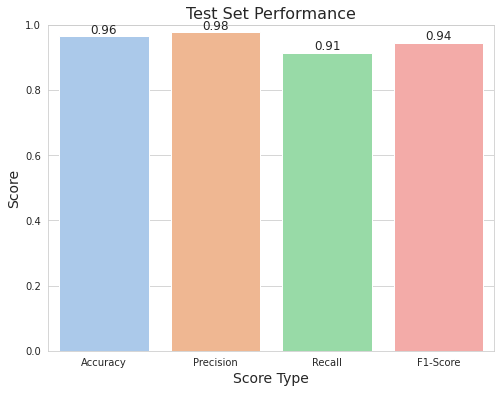

In [13]:

# Training the logistic regression model on the training data with C=0.1
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

# Making predictions on the test data (X_test)
y_pred_test = logreg.predict(X_test)

# We then evaluate the model on the test data
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Test set accuracy: {acc}")
print(f"Test set precision: {prec}")
print(f"Test set recall: {rec}")
print(f"Test set F1-Score: {f1}")

# Ploting the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  we create a dictionary with the score types and their corresponding scores
scores = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

# Converting the dictionary to a pandas DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Seting the style of the plot
sns.set_style('whitegrid')

# Creating a bar plot of the scores
plt.figure(figsize=(8,6))
sns.barplot(x=scores_df.index, y=scores_df.Score, palette='pastel')

# Adding labels to the plot
plt.title('Test Set Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Score Type', fontsize=14)
plt.ylim([0, 1])

# Adding the score values to the bars
for i, v in enumerate(scores_df.Score):
    plt.text(i, v+0.01, f'{v:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()


Test set accuracy: 0.95
Test set precision: 0.8979591836734694
Test set recall: 0.9565217391304348
Test set F1-Score: 0.9263157894736843


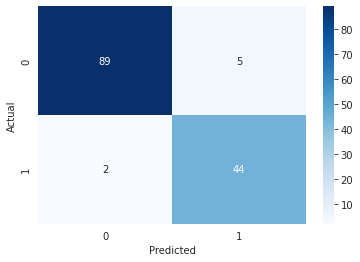

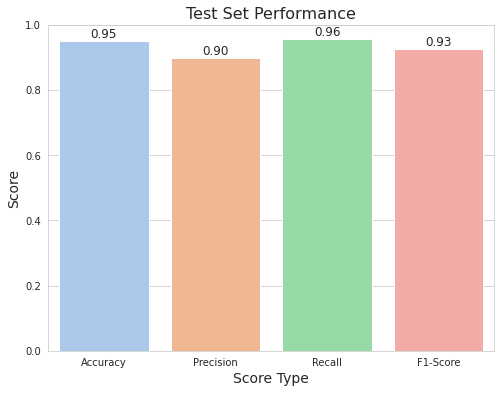

In [14]:
# Training  decision tree model on the training data with max_depth=5
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# Making predictions on the test data (X_test)
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)

# Evaluating the model on the test data
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Test set accuracy: {acc}")
print(f"Test set precision: {prec}")
print(f"Test set recall: {rec}")
print(f"Test set F1-Score: {f1}")

# Ploting the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Creating a dictionary with the score types and their corresponding scores
scores = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

# Converting the dictionary to a pandas DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Set the style of the plot
sns.set_style('whitegrid')

# Creating a bar plot of the scores
plt.figure(figsize=(8,6))
sns.barplot(x=scores_df.index, y=scores_df.Score, palette='pastel')

# Adding labels to the plot
plt.title('Test Set Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Score Type', fontsize=14)
plt.ylim([0, 1])

# Adding the score values to the bars
for i, v in enumerate(scores_df.Score):
    plt.text(i, v+0.01, f'{v:.2f}', ha='center', fontsize=12)

#  the plot
plt.show()

